In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import os
 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 6. Load Saved Model and Conduct Analysis
## (If you want to run this part, please do not run Part 4 and Part 5)

In [ ]:
img_size_cropped = 24
learning_rate = 1e-4

### 1. Load CNN Model

In [48]:
with tf.Graph().as_default():
    global_step = tf.train.get_or_create_global_step()
    x = tf.placeholder(tf.float32, shape=[None, 32, 32, num_channels], name='x')
    y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
    images = pre_process(images=x, training=True)

    with tf.name_scope('model'):
        logits, pool1_cnn, pool2_cnn = compute_logits_cnn(images)

    with tf.name_scope('loss'):
        loss = compute_cross_entropy(logits=logits, y=y_true)

    with tf.name_scope('accuracy'):
        prediction,accuracy = compute_accuracy(logits=logits, y=y_true)

    with tf.name_scope('opt'):
        opt = tf.train.AdamOptimizer(learning_rate)
        train_step = opt.minimize(loss)

    with tf.name_scope('summaries'):
        tf.summary.scalar('loss', loss)
        tf.summary.scalar('accuracy', accuracy)
        tf.summary.histogram('logit', logits)
        tf.summary.image('input', tf.reshape(images, [-1, img_size_cropped, img_size_cropped, num_channels]))
        summary_op = tf.summary.merge_all()

    saver = tf.train.Saver()
    sess2 = tf.Session()
    last_chk_path = tf.train.latest_checkpoint(checkpoint_dir='./CNN/model/')
    saver.restore(sess2, save_path=last_chk_path)

<tf.Tensor 'summaries/loss:0' shape=() dtype=string>

<tf.Tensor 'summaries/accuracy:0' shape=() dtype=string>

<tf.Tensor 'summaries/logit:0' shape=() dtype=string>

<tf.Tensor 'summaries/input:0' shape=() dtype=string>

INFO:tensorflow:Restoring parameters from ./CNN/model/final_model.ckpt


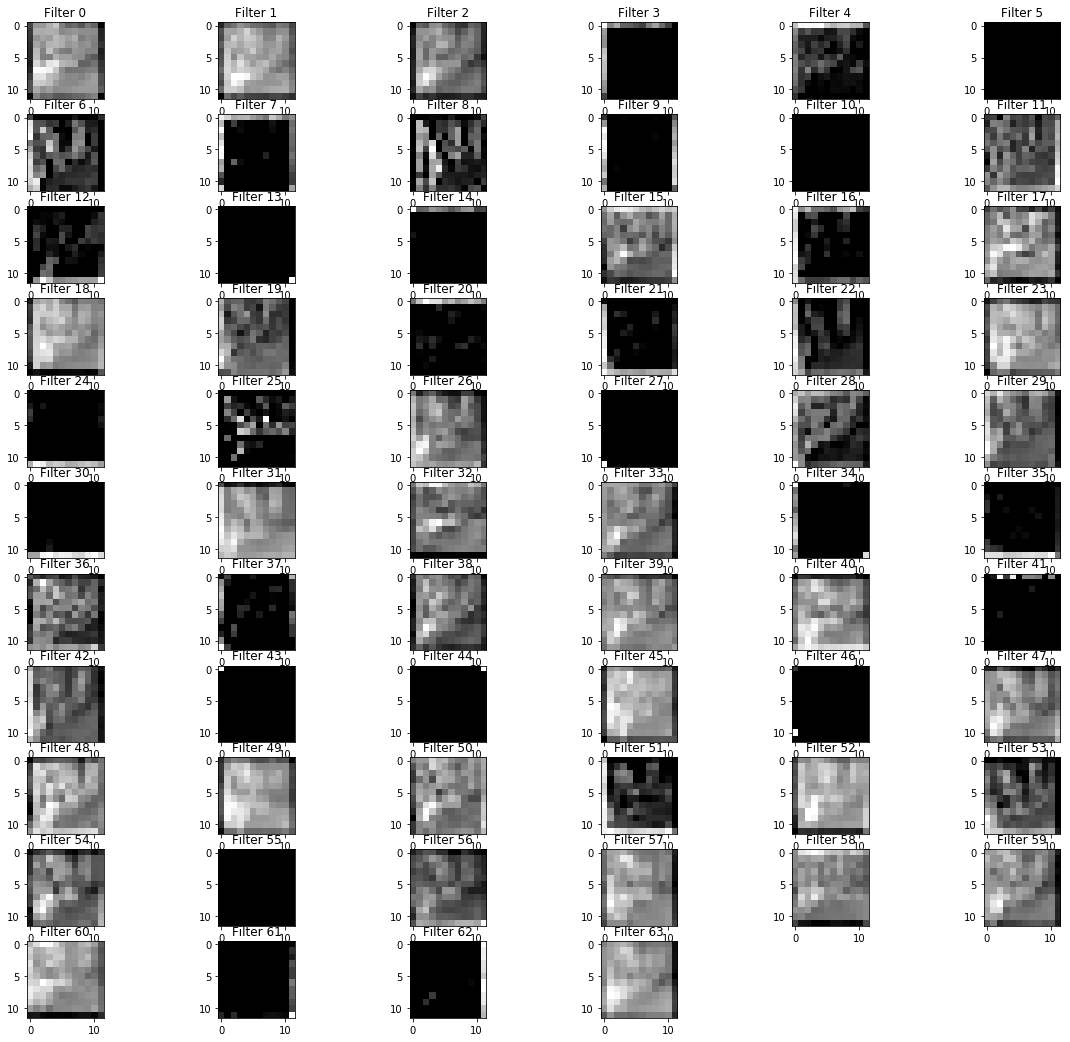

In [52]:
# After Loading the Models, we can do further analysis
getActivations(sess2,pool1_cnn,images_test_for_print)
#Test_Anlaysis(sess2,images_test, labels_test, cls_test[0:100])

### 2. LAOD NIN Model:

In [56]:
tf.reset_default_graph()
with tf.Graph().as_default():
    global_step = tf.train.get_or_create_global_step()
    with tf.device('/cpu:0'):
        # We build the model here as before
        x= tf.placeholder(tf.float32, shape=[None,32,32, num_channels], name='x')
        y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
        images = pre_process(images=x, training=True)
        with tf.name_scope('model'):
            logits,conv1,cccp1,cccp2,pool1,conv2,pool2,cccp3,cccp4,conv3,cccp5,cccp6,pool3 = compute_logits_NIN(images)
            
        with tf.name_scope('loss'):
            loss = compute_cross_entropy(logits=logits, y=y_true)
        with tf.name_scope('accuracy'):
            prediction,accuracy = compute_accuracy(logits=logits, y=y_true)
                
        with tf.name_scope('summaries'):
            # create summary for loss and accuracy
            tf.summary.scalar('loss', loss) 
            tf.summary.scalar('accuracy', accuracy)
            # create summary for logits
            tf.summary.histogram('logits', logits)
            # create summary for input image
            tf.summary.image('input', tf.reshape(images, [-1,img_size_cropped,img_size_cropped, num_channels]))
            summary_op = tf.summary.merge_all()
    
        saver = tf.train.Saver()    ##Save the model
        sess = tf.Session()
        last_chk_path = tf.train.latest_checkpoint(checkpoint_dir='./NIN/model/')
        saver.restore(sess, save_path=last_chk_path)
    
        print("Trying to restore last checkpoint ...")
        last_chk_path = tf.train.latest_checkpoint(checkpoint_dir='./NIN/model/')
        saver.restore(sess, save_path=last_chk_path)

<tf.Tensor 'summaries/loss:0' shape=() dtype=string>

<tf.Tensor 'summaries/accuracy:0' shape=() dtype=string>

<tf.Tensor 'summaries/logits:0' shape=() dtype=string>

<tf.Tensor 'summaries/input:0' shape=() dtype=string>

INFO:tensorflow:Restoring parameters from ./NIN/model/model.ckpt
Trying to restore last checkpoint ...
INFO:tensorflow:Restoring parameters from ./NIN/model/model.ckpt


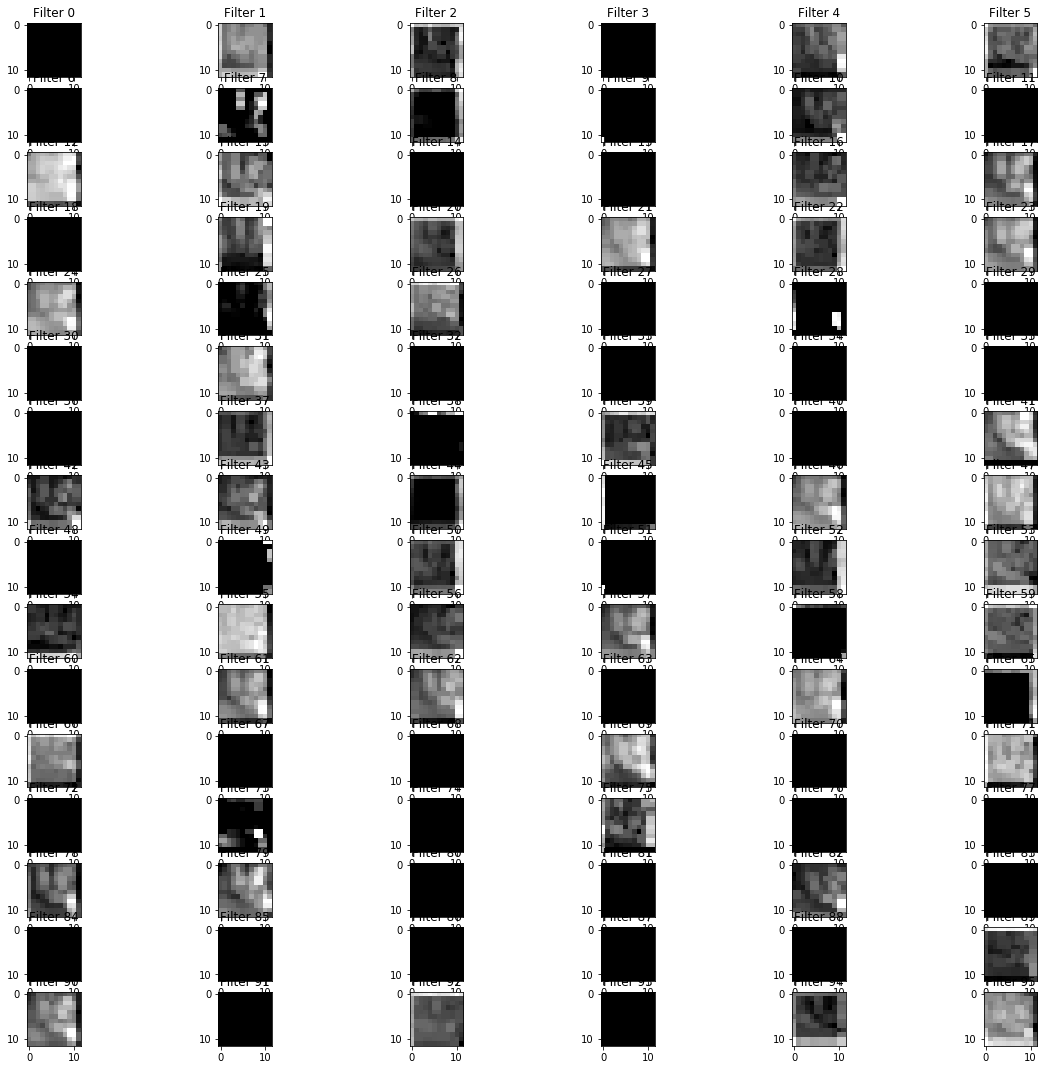

In [57]:
getActivations(sess,pool1,images_test_for_print)